## Score: 100

## Comment: 

<font color=Red>
Q1.[10] Correct
<br><br>
Q2.[10] Correct
<br><br>
Q3.[15+5] Correct
<br><br>
Q4.[5+15+5] Correct 4.1可以考虑使用random.randint 4.3 第一个单元格中使用了等差数列range(1, n+1)而不是随机数组，但后续改正回来了。建议以后清理干净单元格再上交作业，有可能看串
<br><br>
Q5.[5+25+5] Correct
</font>


In [1]:
#1.Flowchart
def Print_values(a,b,c):
    if a>b:#流程图右边
        if b>c:
            lst = [a, b, c]
        elif a>c:
            lst = [a, c, b]
        else:
            lst = [c, a, b]
    else:#流程图左边
        if b>c:
            lst = [c, a, b]
        else:
            lst = [c, b, a]
    x,y,z=lst#赋值
    result=x+y-10*z
    print(result)
    return result
Print_values(5,15,10)#输出结果为-135

-135


-135

In [1]:
#2.Continuous celing function
import math
def F(x):
    if x==1:
        return 1 #递归的终止条件：当x等于1时，返回1
    else:
        return F(math.ceil(x/3))+2*x #递归调用：计算向上取整(x/3)对应的F值，再加上2*x
        
user_input=input("Please enter your numbers (separated by spaces): ") #请用户输入一系列整数，用空格空开
mylist=[num for num in user_input.split()] #将用户输入的字符串按空格分割，并转换为列表
for i in range(len(mylist)):#循环
    print(F(int((mylist[i])))) #将字符串类型的元素转换为整数，调用F函数计算并打印结果
mylist.append(input("Please enter your number"))

33


In [ ]:
#3.Dice rolling
#3.1
#效率较低的写法,就是穷举十个六面骰子可能的解法，运算量较大
"""def Find_number_of_ways(sum):
    ways=0
    for a in range(6):
        for b in range(6):      
            for c in range(6):
                for d in range(6):
                    for e in range(6):                     
                        for f in range(6):                    
                            for g in range(6):
                                for h in range(6):
                                    for i in range(6):               
                                        for j in range(6):
                                            if a+b+c+d+e+f+g+h+i+j+10==sum:
                                                ways=ways+1                                    
    return ways
print(Find_number_of_ways(10))
print(Find_number_of_ways(11))"""

In [3]:
#3.1高级的写法，想法来自deepseek
def Find_number_of_ways2(d,s):#每个骰子点数是1-6，10个骰子的和最小是10（全是1）、最大是60（全是6）。我们要算的是：用d个骰子（d从1到10），掷出和为s（s从d到6d），有多少种方式
    if d==1:#1 个骰子能掷出的和是 1-6，每种和只有 1 种方式；和小于 1 或大于 6，方式数都是 0
        if 1<=s<=6:
            return 1
        else:
            return 0
    if d>1:
            #用二维表格dp来表示，表格的行代表“用了几个骰子”（从0个到10个），列代表 “掷出的和”（从0到60）。表格里的dp[d][s]就表示 “用d个骰子掷出和为s的方式数”。
            #用d个骰子掷出和为s的方式数，等于“第d个骰子掷出k点（k=1-6），且前d-1个骰子掷出和为s-k”的方式数之和
            #用公式来表达就是：dp[d][s] = dp[d-1][s-1] + dp[d-1][s-2] + dp[d-1][s-3] + dp[d-1][s-4] + dp[d-1][s-5] + dp[d-1][s-6]
            #举个例子，如果你用10个骰子投掷出了36，那么你最后一个骰子掷出的点数在1-6，用10个骰子掷出36的方法数，等于“最后一个投掷掷出1，而之前的9个骰子掷出了35，也就是用9个骰子掷出35的方法数之和”加上
            #“最后一个投掷掷出2，而之前的9个骰子掷出了34，也就是用9个骰子掷出34的方法数之和”加上...一直加到“最后一个投掷掷出6，而之前的9个骰子掷出了30，也就是用9个骰子掷出30的方法数之和”
        total_ways=0 #用于累加所有合法的方式数
        # 前d-1个骰子的和必须在 [d-1, 6*(d-1)] 范围内
        # 第d个骰子的点数是 s - (i+1)，必须在1-6之间
        for i in range(s):
            prev_sum = i + 1 #前d-1个骰子的和
            if (d-1) <= prev_sum <= 6*(d-1):#检查前d-1个骰子的和是否合法
                if 1 <= (s - prev_sum) <= 6:#检查第d个骰子的点数是否合法（1-6）
                    total_ways=total_ways+Find_number_of_ways2(d-1,i+1)#递归累加前d-1个骰子凑prev_sum的方式数
        return total_ways

In [4]:
Find_number_of_ways2(10,35)

4395456

In [5]:
#3.2
numbers = range(10, 61)#10到60的整数（10个骰子的可能和）
Number_of_ways = [Find_number_of_ways2(10, s) for s in numbers]#计算每个和对应的方式数，存入Number_of_ways列表
max_value = max(Number_of_ways)#查找最大方式数
for s, ways in zip(numbers, Number_of_ways):#来自deepseek：zip 是 Python 的内置函数，作用是将两个可迭代对象（这里是 numbers 和 Number_of_ways）的元素 “一一配对”，打包成元组
    if ways == max_value:#找出所有和为max_value对应的s并打印
        print(f"10个骰子掷出和为{s}时，方式数最大，为{max_value}")#学自deepseek：使用f"..."语法，让s和max_value被替换为实际数值，确保输出可读。


10个骰子掷出和为35时，方式数最大，为4395456


In [2]:
#4.Dynamic programming
#4.1
import random
import numpy as np 
def Random_integer(N):
    arr2=np.array([]) #初始化空数组
    for i in range(N): #用range(N)循环N次
        arr1=np.array([int(random.random()*11)])#生成0-10的随机整数
        arr2=np.concatenate((arr1, arr2)) #拼接现有数组arr2和新元素arr1，更新arr2
    arr=arr2 #最终数组赋值给arr
    print(arr)
    return arr
Random_integer(10)
    

[ 0.  8.  5.  4.  9. 10.  3.  4.  5.  6.]


array([ 0.,  8.,  5.,  4.,  9., 10.,  3.,  4.,  5.,  6.])

In [3]:
#4.2
import numpy as np
import math #用于计算组合数
def Sum_averages(a):
    arr=np.array(a)#将数组赋值
    count_len=len(arr)#计算数组长度
    sum_arr=arr.sum()#计算数组所有元素的加和
    Sum_averages=0#计算所有非空子集的平均值之和
    #编程构思如下：假如一个数组【a，b，c，d】给我，我要计算所有非空子集的平均数之和，非空子集的排列方式为【a】，【b】，【c】，【d】；
    #【a，b】、【a、c】、【a、d】、【b、c】、【b、d】、【c、d】；【a、b、c】、【a、c、d】、【a、c、d】、【b、c、d】；【a、b、c、d】，可以发现除了子集中只有一个元素
    #的排列和包含所有元素的排列，其他的排列中，a、b、c、d各出现了3次。在计算平均数的时候，可以将分母相同的式子一起相加。
    #（【a】，【b】，【c】，【d】）/1+【a，b】、（【a、c】、【a、d】、【b、c】、【b、d】、（【c、d】）/2
    #【a、c、d】、【a、c、d】、【b、c、d】）/3、【a、b、c、d】/4
    #在这个计算式子中，分母是按照元素的个数一直增加的，从1一直增加到4
    #分子中，首尾的abcd一共出现了1次；中间部分的abcd一共出现了3次（每个元素在长度为k的子集中出现的次数，应该是组合数C(n-1, k-1)）
    for k in range(1, count_len + 1):#遍历子集长度k（从1到n）
       # 组合数C(n-1, k-1)：每个元素在长度为k的子集中出现的次数
        comb_num = math.comb(count_len - 1, k - 1)
        # 长度为k的所有子集的平均值之和 = (总和 × 每个元素出现次数) ÷ k
        Sum_averages += sum_arr * comb_num / k
    return Sum_averages

Sum_averages([1,2,3]) # 输出14

np.float64(14.0)

[8.]
[7. 5.]
[3. 6. 9.]
[ 9. 10. 10.  4.]
[ 0.  7.  8.  2. 10.]
[10.  2.  9.  2.  5.  2.]
[1. 7. 7. 8. 0. 2. 3.]
[9. 6. 7. 8. 3. 7. 3. 4.]
[1. 7. 5. 0. 8. 8. 4. 6. 7.]
[ 6.  9.  7. 10.  2. 10.  6.  2.  6.  1.]
[ 9.  0.  0.  1. 10.  7.  9.  4.  6.  3.  4.]
[ 7.  4. 10.  8.  1.  9.  0.  2.  4.  8.  0.  1.]
[10.  6.  7.  0.  9.  3.  1.  7.  9.  8.  0.  4.  7.]
[ 4.  4.  3.  6.  8.  3.  4.  8.  9.  1.  1. 10.  3.  6.]
[7. 8. 1. 9. 1. 7. 3. 5. 2. 2. 7. 6. 4. 6. 6.]
[10.  0.  7.  7. 10.  5.  7.  4.  9.  5.  0.  5.  5.  2. 10. 10.]
[2. 2. 4. 7. 5. 1. 7. 6. 4. 2. 9. 2. 6. 5. 3. 7. 4.]
[ 4. 10.  7.  4.  3.  1.  4.  9.  9.  4.  4.  0.  6.  1.  9.  3.  8.  8.]
[ 2.  1.  5.  5.  2.  9.  3.  4.  7. 10. 10.  0.  5.  3.  9.  4.  5.  6.
  5.]
[6. 5. 3. 3. 1. 8. 9. 8. 6. 6. 8. 4. 5. 5. 2. 8. 2. 7. 5. 6.]
[ 7.  7.  8.  6.  1. 10.  3.  9.  3. 10. 10.  0.  9.  5.  7.  8.  5.  0.
  2.  2.  8.]
[7. 8. 9. 4. 4. 2. 0. 2. 6. 6. 1. 9. 2. 2. 3. 2. 9. 3. 2. 1. 7. 1.]
[ 9.  5.  9. 10.  1.  8.  4.  2.  4.  7.  4.  

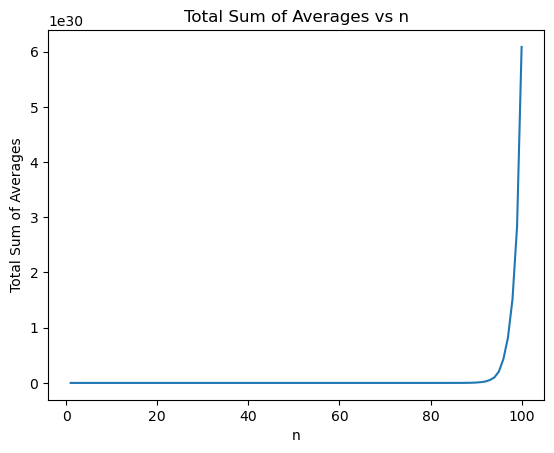

In [ ]:
#4.3
import matplotlib.pyplot as plt #和豆包学习的用法
import numpy as np
import math
#Total_sum_averages=[]
#for n in range (1,101):
#    arr=list(range(1,n+1))
#    total = Sum_averages(arr)
#    Total_sum_averages.append(total)
# 使用随机数组
Total_sum_averages = []
for n in range(1, 101):
    arr = Random_integer(n)  
    total = Sum_averages(arr)
    Total_sum_averages.append(total)
plt.plot(range(1, 101), Total_sum_averages)
plt.xlabel('n')
plt.ylabel('Total Sum of Averages')
plt.title('Total Sum of Averages vs n')
plt.show()

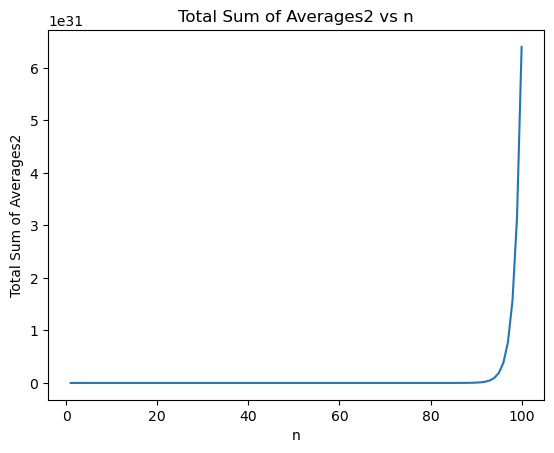

In [4]:
# 4.2 原来的4.2的版本运行之后会出现“int too big to convert”的情况
#这是使用豆包简化后的计算函数
def Sum_averages2(a):
    n = len(a)
    if n == 0:  # 处理空数组边缘情况
        return 0.0
    total_sum = sum(a)  # 数组元素总和
    # 应用公式：总和 × (2^n - 1) / n
    return total_sum * (2 **n - 1) / n

# 4.3 绘图部分保持不变
import matplotlib.pyplot as plt

Total_sum_averages2 = []
for n in range(1, 101):
    arr = list(range(1, n + 1))
    total = Sum_averages2(arr)
    Total_sum_averages2.append(total)

plt.plot(range(1, 101), Total_sum_averages2)
plt.xlabel('n')
plt.ylabel('Total Sum of Averages2')
plt.title('Total Sum of Averages2 vs n')
plt.show()

In [13]:
#5.Path counting
#5.1
import numpy as np
import random
rows=input("请确认你的行数: ")
columns=input("请确认你的列数: ")
matrix = np.ones((int(rows),int(columns))) #先随机生成，再来处理角落
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        matrix[i][j]=round(random.random())
matrix[0][0]=1
matrix[int(rows)-1][int(columns)-1]=1
print(matrix)

[[1. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 0. 1. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 1.]]


In [14]:
#5.2
def Count_path(matrix):
    # 思路如下(学自豆包)：用dp[i][j]用来记录从左上角(0,0)到当前格子(i,j)的路径总数，对于一个给定的格子，它只能向右或者向下走。
    # 第一行的格子只能从左边的格子向右走到达，因此路径数由左边格子的路径数决定（若当前格子是障碍物，则路径数为0
    # 同样的，第一列的格子只能从上方的格子向下走到达，因此路径数由上方格子的路径数决定（若当前格子是障碍物，则路径数为0
    # 中间的格子可以从上方或左方走过来，因此路径数是 “上方路径数 + 左方路径数”（若当前格子是障碍物，则路径数为0
    # 最终返回的dp[rows-1][cols-1]继承了所有可通路径的路径数，即从左上角到右下角的总路径数
    
    # 获取矩阵的行数和列数
    rows = len(matrix)
    cols = len(matrix[0])
    # 创建一个和原矩阵一样大小的二维列表,每个dp[i][j] 就对应矩阵中第 i 行第 j 列的格子，初始值都是 0
    # dp[i][j]表示从左上角到(i,j)的路径数
    dp = [[0 for _ in range(cols)] for _ in range(rows)]
    
    # 处理左上角起点：如果起点是1（可走），则路径数为1；否则为0
    dp[0][0] = 1 if matrix[0][0] == 1 else 0
    
    # 处理第一行：只能从左边的格子向右走过来
    for j in range(1, cols):
        if matrix[0][j] == 1:  # 当前格子可走
            dp[0][j] = dp[0][j-1]  # 路径数等于左边格子的路径数
        else:  # 当前格子不可走
            dp[0][j] = 0
    
    # 处理第一列：只能从上方的格子向下走过来
    for i in range(1, rows):
        if matrix[i][0] == 1:  # 当前格子可走
            dp[i][0] = dp[i-1][0]  # 路径数等于上方格子的路径数
        else:  # 当前格子不可走
            dp[i][0] = 0
    
    # 处理中间的格子：可以从上方或左方走过来
    for i in range(1, rows):
        for j in range(1, cols):
            if matrix[i][j] == 0:  # 当前格子是障碍物
                dp[i][j] = 0
            else:  # 当前格子可走，路径数=上方路径数+左方路径数
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
    
    # 返回右下角的路径数
    return dp[rows-1][cols-1]

In [16]:
#5.3
import numpy as np
import random
def matrix_creation(rows, cols):#定义生成矩阵的函数（N行M列，仅角落保持1，其余随机0/1）
    matrix = np.ones((int(rows),int(cols)))
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            matrix[i][j]=round(random.random())
    matrix[0][0]=1
    matrix[int(rows)-1][int(cols)-1]=1
    return matrix
#执行1000次实验并记录
N=10
M=8
n_runs=100000
total_paths=[]
for _ in range(n_runs):
    mat = matrix_creation(N, M)
    path_count = Count_path(mat)
    total_paths.append(path_count)
#计算平均值
mean_path=sum(total_paths)/n_runs
print(f"1000次运行后，路径数的平均值为：{mean_path}")

1000次运行后，路径数的平均值为：0.3487
